**Importing And Exploring Dataset**

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import pandas as pd
data = pd.read_csv('Bengaluru_House_Data.csv')


In [4]:
data.head(15)



,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
data.drop_duplicates(inplace=True)


In [6]:
data['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


**Data Cleaning and Initial Processing**

---



In [8]:
data.rename(columns={'size': 'size(BHK)'}, inplace=True)
# Convert to numeric, invalid parsing will be set as NaN
data['size(BHK)'] = pd.to_numeric(data['size(BHK)'].str.extract('(\d+)')[0], errors='coerce')




In [9]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def convert_range_to_num(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1])) / 2
    try:
        return float(x)
    except:
        return None

In [11]:
data['total_sqft'] = data['total_sqft'].apply(convert_range_to_num)

In [12]:
data.isnull().sum()


,0
area_type,0
availability,0
location,1
size(BHK),16
society,5328
total_sqft,46
bath,73
balcony,605
price,0


In [13]:
data.drop('society', axis=1, inplace=True)

Handling Missing Values


In [14]:
data['location'].fillna(data['location'].mode()[0], inplace=True)
data['balcony'].fillna(data['balcony'].median(), inplace=True)
data['bath'].fillna(data['bath'].median(), inplace=True)
data['size(BHK)'].fillna(data['size(BHK)'].median(), inplace=True)
data['price'].fillna(data['price'].median(), inplace=True)
data['total_sqft'].fillna(data['total_sqft'].median(), inplace=True)
data['availability'].fillna(data['availability'].mode()[0], inplace=True)








In [15]:
data.isnull().sum()

,0
area_type,0
availability,0
location,0
size(BHK),0
total_sqft,0
bath,0
balcony,0
price,0


 **Feature_Engineering**

### Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [16]:
data.location.unique()
len(data.location.unique())

1305

In [17]:
data.location = data.location.apply(lambda x: x.strip()) # removing white space

location_stats= data.groupby('location')['location'].agg('count')
location_stats

,location
location,
1 Annasandrapalya,1
1 Giri Nagar,1
1 Immadihalli,1
1 Ramamurthy Nagar,1
12th cross srinivas nagar banshankari 3rd stage,1
...,...
t.c palya,1
tc.palya,4
vinayakanagar,1


In [18]:
location_stats= data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,525
Sarjapur Road,379
Electronic City,289
Kanakpura Road,249
Thanisandra,232
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [19]:
len(location_stats[location_stats<=5])

914

In [20]:
location_stats_less_then_10 = location_stats[location_stats<=10]
location_stats_less_then_10

,location
location,
Vasanthapura,10
Kalkere,10
1st Block Koramangala,10
Dairy Circle,10
Pattandur Agrahara,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [21]:
len(data.location.unique())
data.location = data.location.apply(lambda x: 'Other' if x in location_stats_less_then_10 else x)
len(data.location.unique())
# Get unique values from the 'location' column
unique_locations = data['location'].unique()



print(len(unique_locations))




234


In [22]:
data.head(50)

,area_type,availability,location,size(BHK),total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.00,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.00,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.00,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.00,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.00,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2.0,1170.00,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4.0,2732.00,4.0,2.0,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4.0,3300.00,4.0,2.0,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3.0,1310.00,3.0,1.0,63.25
9,Plot Area,Ready To Move,Other,6.0,1020.00,6.0,2.0,370.00


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12791 non-null  object 
 3   size(BHK)     12791 non-null  float64
 4   total_sqft    12791 non-null  float64
 5   bath          12791 non-null  float64
 6   balcony       12791 non-null  float64
 7   price         12791 non-null  float64
dtypes: float64(5), object(3)
memory usage: 899.4+ KB


In [24]:

data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']

data.loc[data['availability'] !='Ready To Move','availability'] = 'Under Construction'






In [25]:
print(data.shape)

(12791, 9)


In [26]:
# Save the cleaned dataset to a new CSV file
data.to_csv('Bengaluru_House_Data_temp.csv', index=False)
data1=pd.read_csv('Bengaluru_House_Data_temp.csv')



**Handling Outliers**


Numerical Features:
Index(['size(BHK)', 'total_sqft', 'bath', 'balcony', 'price',
       'price_per_sqft'],
      dtype='object')


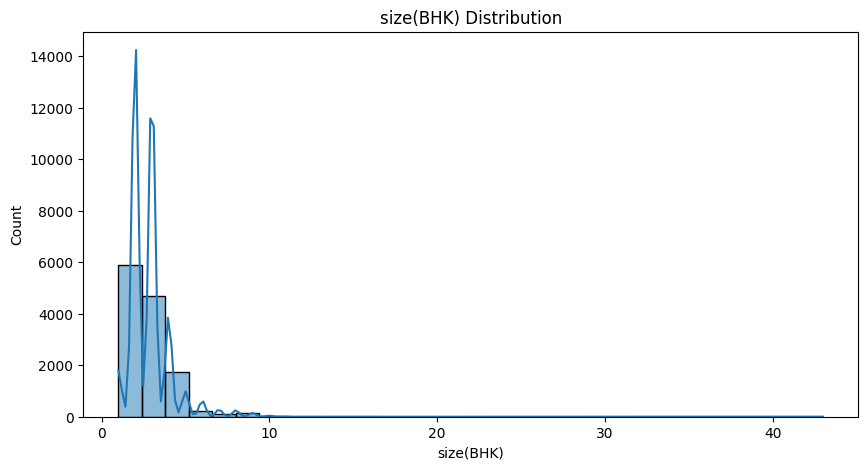

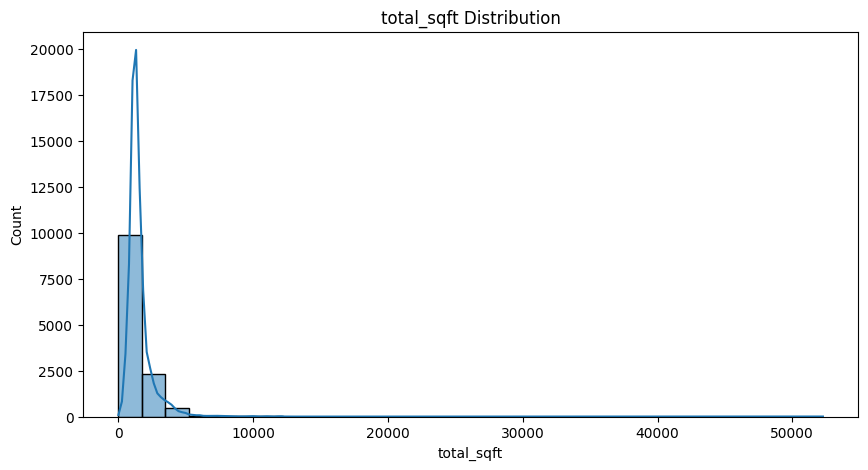

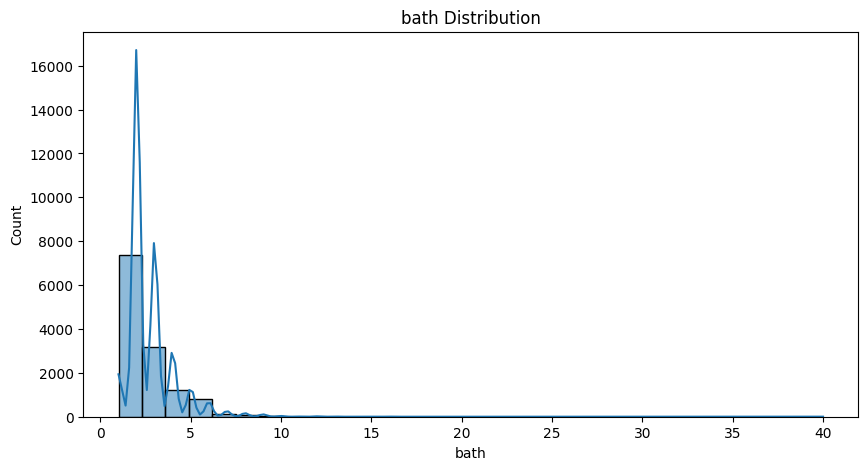

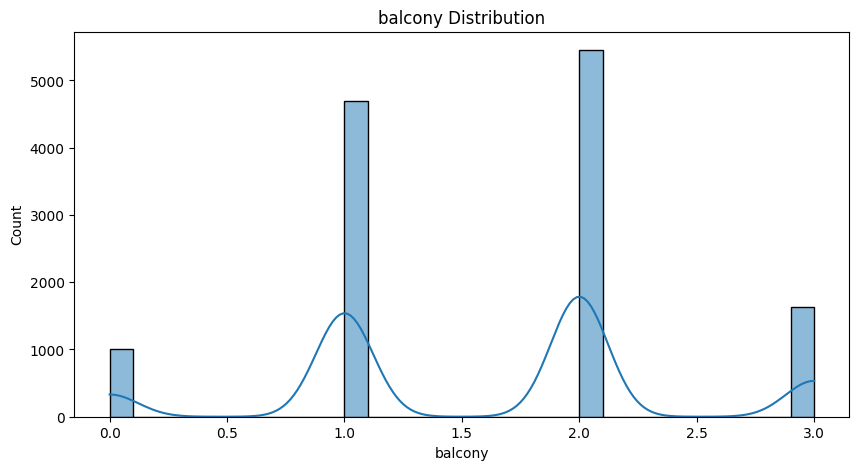

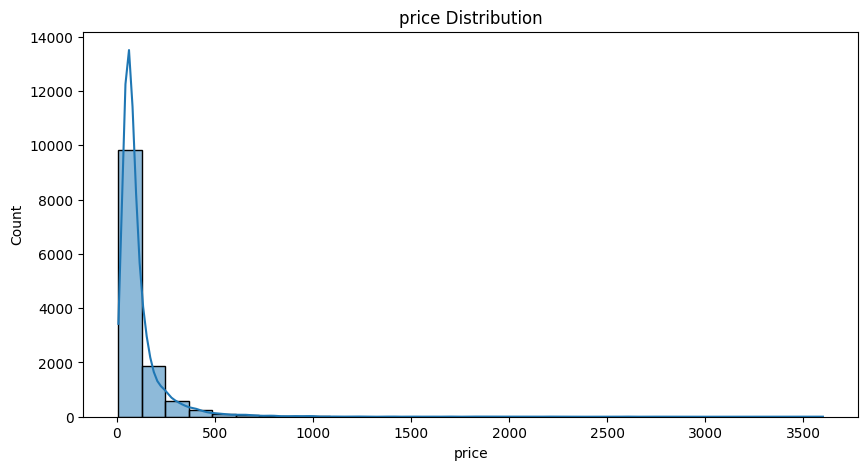

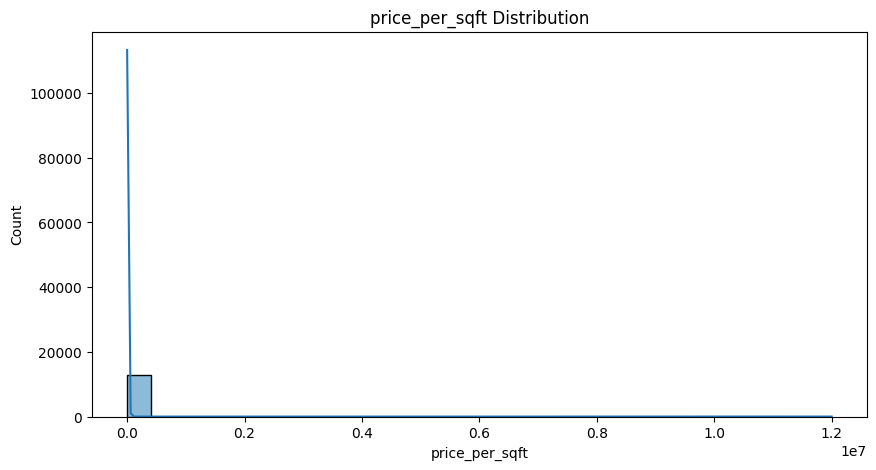

In [27]:
# Select only the numerical columns
numerical_features = data1.select_dtypes(include=['int64', 'float64']).columns

# Print the numerical features
print("Numerical Features:")
print(numerical_features)
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data1[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()



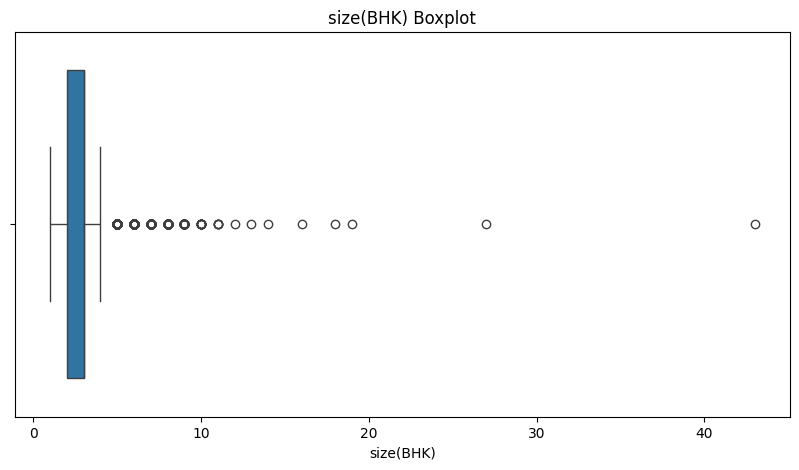

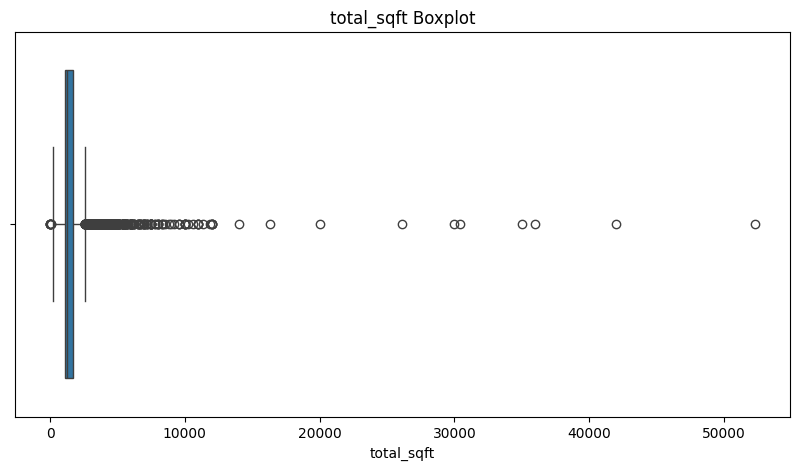

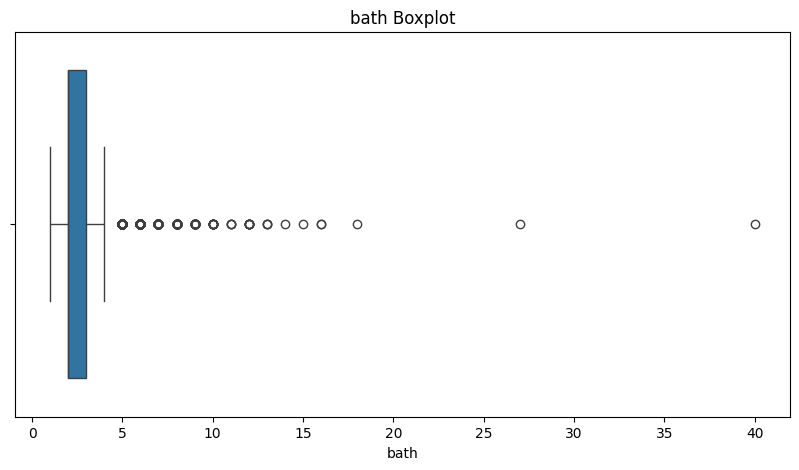

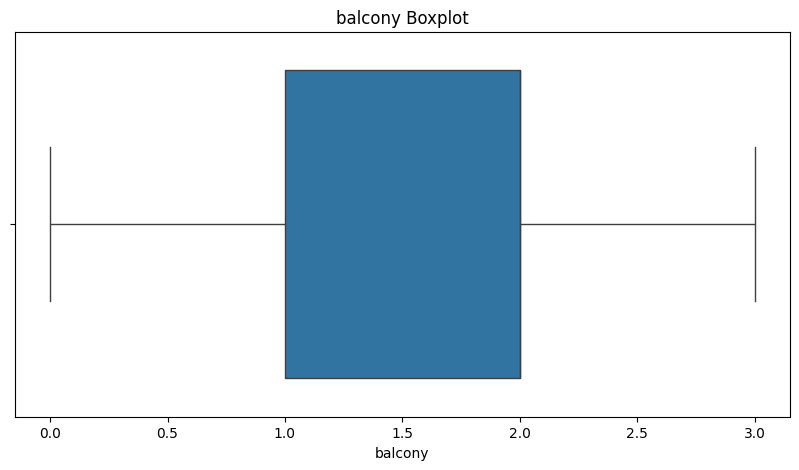

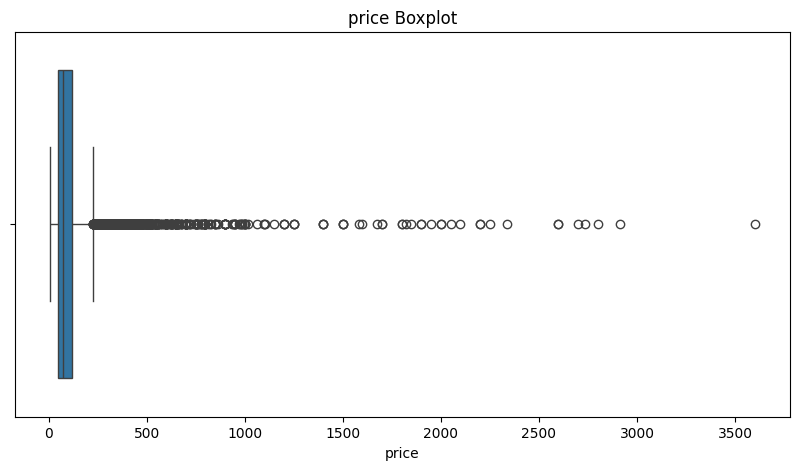

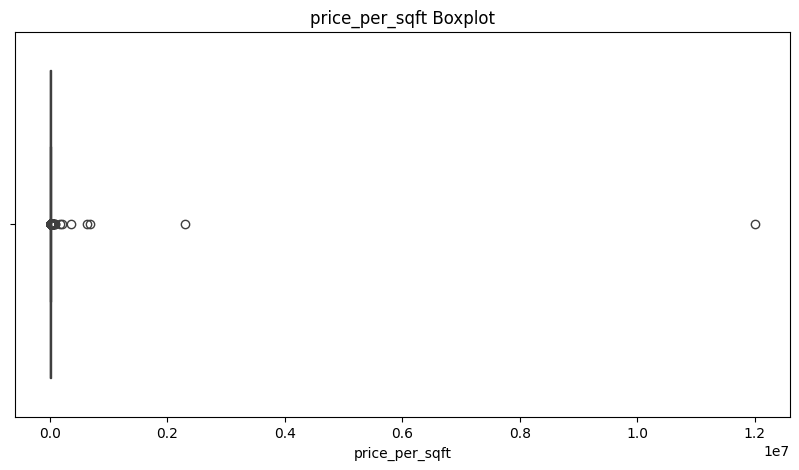

In [28]:
for feature in numerical_features:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=data1[feature])
  plt.title(f'{feature} Boxplot')
  plt.show()

In [29]:
data1.describe()

,size(BHK),total_sqft,bath,balcony,price,price_per_sqft
count,12791.000000,12791.000000,12791.000000,12791.000000,12791.000000,1.279100e+04
mean,2.818075,1568.562185,2.704558,1.602064,114.317646,8.034748e+03
std,1.311036,1257.686848,1.354936,0.807728,151.480310,1.084194e+05
min,1.000000,1.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,50.000000,4.298527e+03
50%,3.000000,1280.000000,2.000000,2.000000,73.000000,5.486239e+03
75%,3.000000,1690.000000,3.000000,2.000000,121.000000,7.407407e+03
max,43.000000,52272.000000,40.000000,3.000000,3600.000000,1.200000e+07


In [30]:
(data1['total_sqft'] / data1['size(BHK)']).describe()

,0
count,12791.000000
mean,575.917560
std,394.789428
min,0.250000
25%,473.000000
50%,552.000000
75%,626.666667
max,26136.000000


In [31]:
data1 = data1[((data1['total_sqft'] / data1['size(BHK)']) >= 300)]
data1.describe()

,size(BHK),total_sqft,bath,balcony,price,price_per_sqft
count,12049.000000,12049.000000,12049.000000,12049.000000,12049.000000,12049.000000
mean,2.661134,1605.195029,2.571085,1.602457,113.274769,6372.981150
std,0.987951,1281.979139,1.089815,0.801609,154.641738,4239.136960
min,1.000000,300.000000,1.000000,0.000000,8.440000,267.829813
25%,2.000000,1120.000000,2.000000,1.000000,49.970000,4250.000000
50%,3.000000,1305.000000,2.000000,2.000000,70.000000,5333.333333
75%,3.000000,1713.000000,3.000000,2.000000,120.000000,6978.922717
max,16.000000,52272.000000,16.000000,3.000000,3600.000000,176470.588235


In [32]:
data1.price_per_sqft.describe()

,price_per_sqft
count,12049.000000
mean,6372.981150
std,4239.136960
min,267.829813
25%,4250.000000
50%,5333.333333
75%,6978.922717
max,176470.588235


In [33]:
def remove_outliers_sqft(df):
    data1_output = pd.DataFrame()
    for key,subdata1 in data1.groupby('location'):
        m = np.mean(subdata1.price_per_sqft)
        st = np.std(subdata1.price_per_sqft)
        gen_data1 = subdata1[(subdata1.price_per_sqft > (m - st)) & (subdata1.price_per_sqft <= (m + st))]
        data1_output = pd.concat([data1_output, gen_data1], ignore_index = True)
    return data1_output
data1 = remove_outliers_sqft(data1)
data1.describe()

,size(BHK),total_sqft,bath,balcony,price,price_per_sqft
count,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000
mean,2.583224,1519.298388,2.484461,1.605552,92.820336,5713.080321
std,0.908446,896.391838,0.993711,0.791537,87.935122,2294.130559
min,1.000000,300.000000,1.000000,0.000000,10.000000,1250.000000
25%,2.000000,1108.000000,2.000000,1.000000,49.565000,4280.522948
50%,2.000000,1296.000000,2.000000,2.000000,68.000000,5209.953344
75%,3.000000,1661.200000,3.000000,2.000000,101.000000,6500.000000
max,16.000000,30400.000000,16.000000,3.000000,2200.000000,24509.803922


In [34]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size(BHK)'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size(BHK)'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [35]:
data1 = bhk_outlier_remover(data1)

In [36]:
data1.shape

(7067, 9)

In [37]:
import pandas as pd
print("statsbefore:",data1.describe())
# Define a function to remove outliers using IQR for each numerical feature
def remove_outliers(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows with outliers in the specified column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from each specified column and update data2
for col in ['size(BHK)',  'bath','total_sqft', 'price','price_per_sqft']:
  data1 = remove_outliers(data1,col )  # Update data after each outlier removal

# Display the cleaned dataset
print("statafter:",data1.describe())
print("Shape after removing outliers:", data1.shape)



statsbefore:          size(BHK)    total_sqft         bath      balcony        price  \
count  7067.000000   7067.000000  7067.000000  7067.000000  7067.000000   
mean      2.516910   1511.485624     2.465969     1.563888   101.226274   
std       0.943847    884.102111     1.030292     0.789105    95.152308   
min       1.000000    300.000000     1.000000     0.000000    10.000000   
25%       2.000000   1100.000000     2.000000     1.000000    51.000000   
50%       2.000000   1270.000000     2.000000     2.000000    75.000000   
75%       3.000000   1693.000000     3.000000     2.000000   115.000000   
max      16.000000  30000.000000    16.000000     3.000000  2200.000000   

       price_per_sqft  
count     7067.000000  
mean      6204.706746  
std       2435.231424  
min       1300.000000  
25%       4682.767874  
50%       5745.856354  
75%       6969.696970  
max      24509.803922  
statafter:          size(BHK)   total_sqft         bath      balcony        price  \
count  588

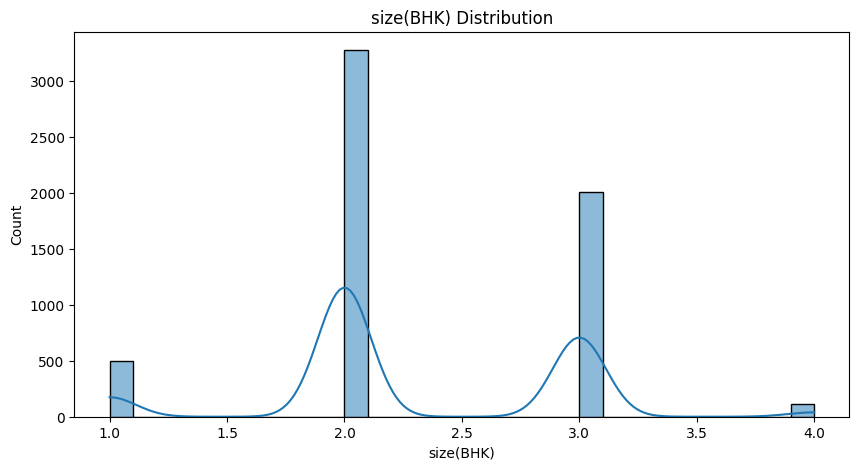

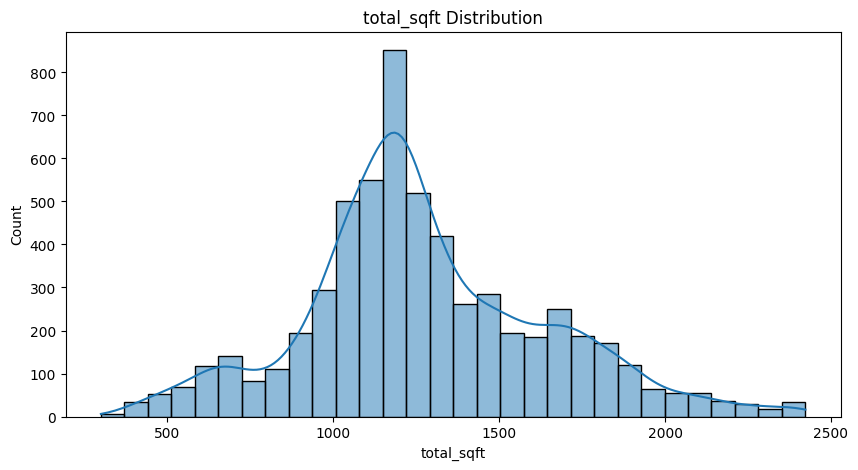

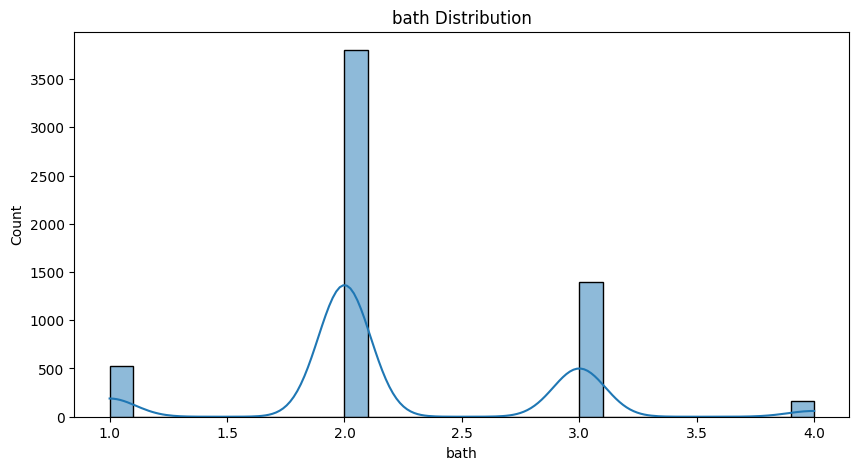

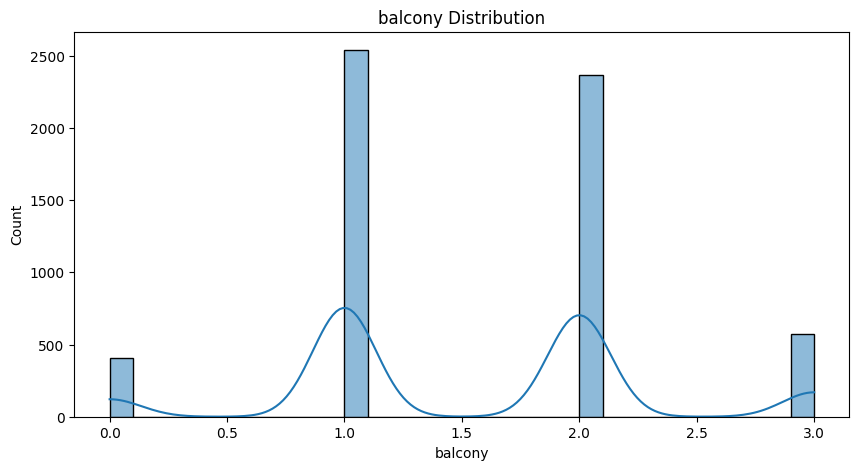

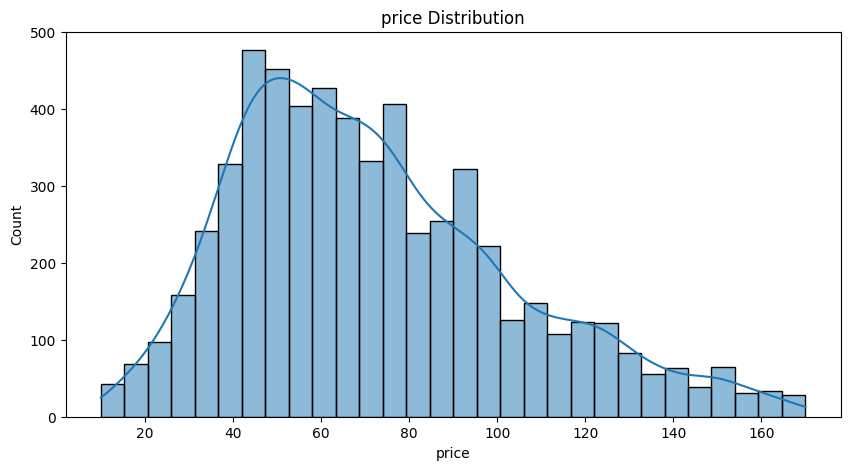

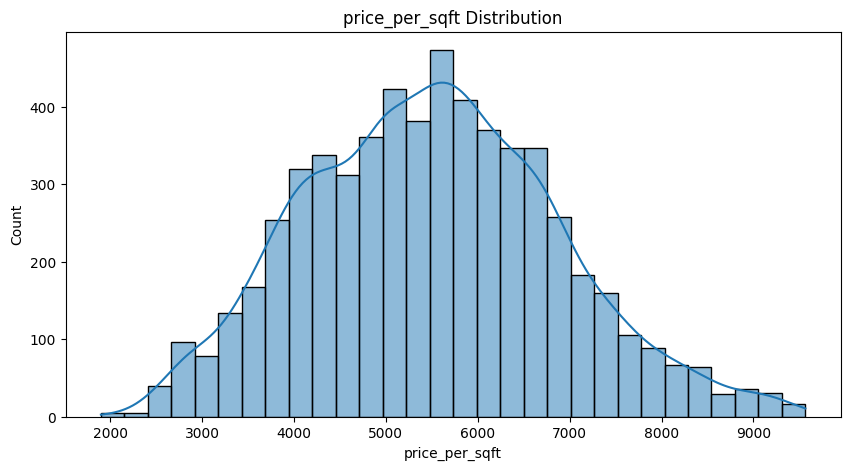

In [38]:


for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data1[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()


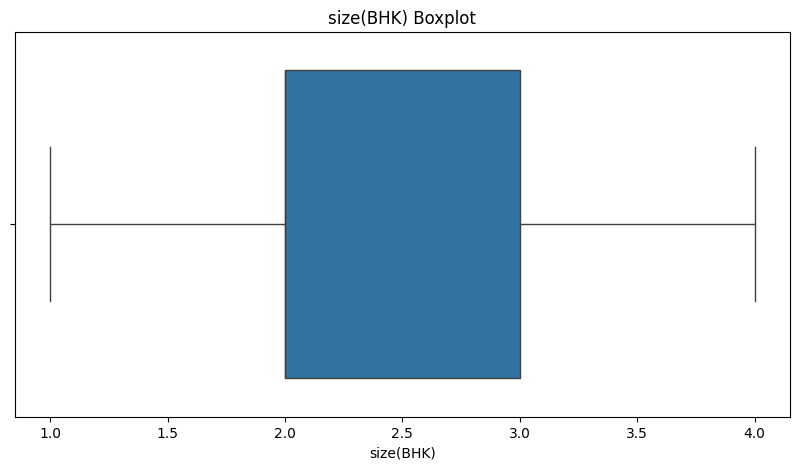

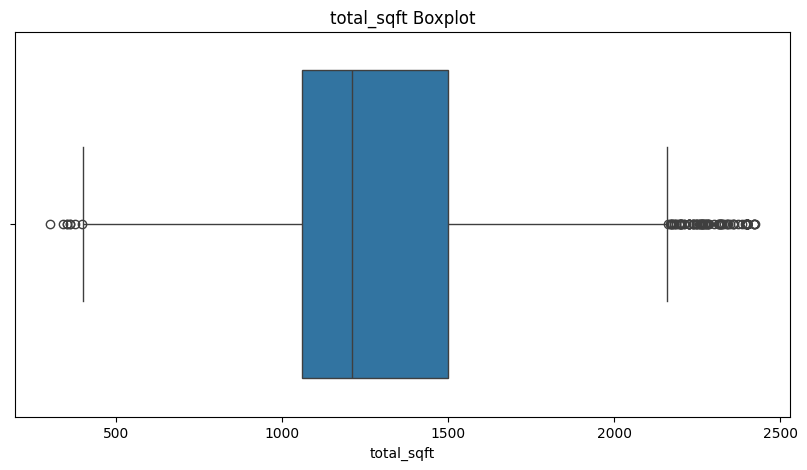

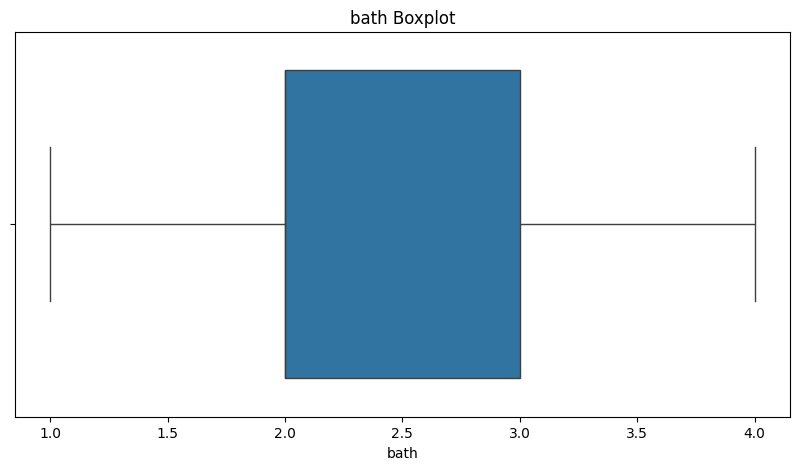

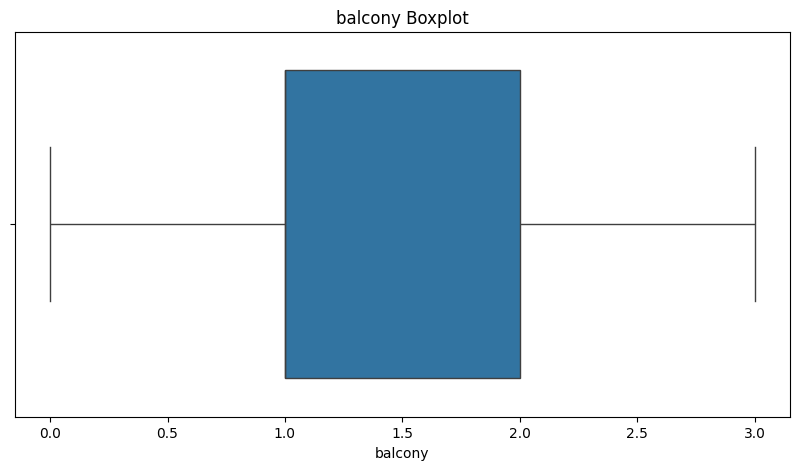

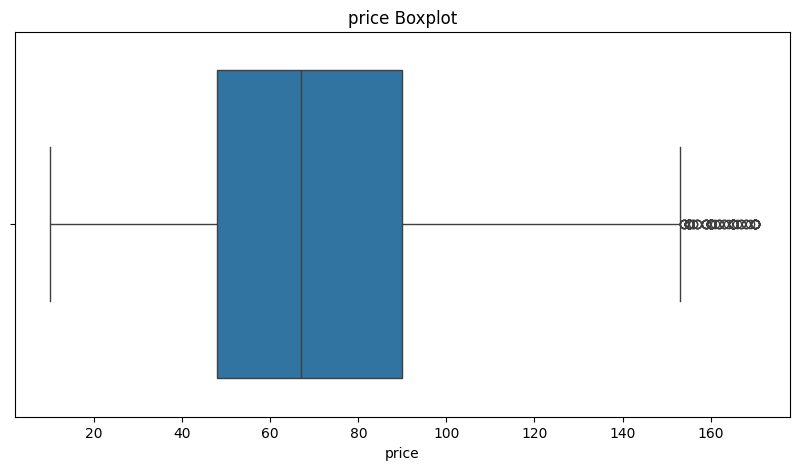

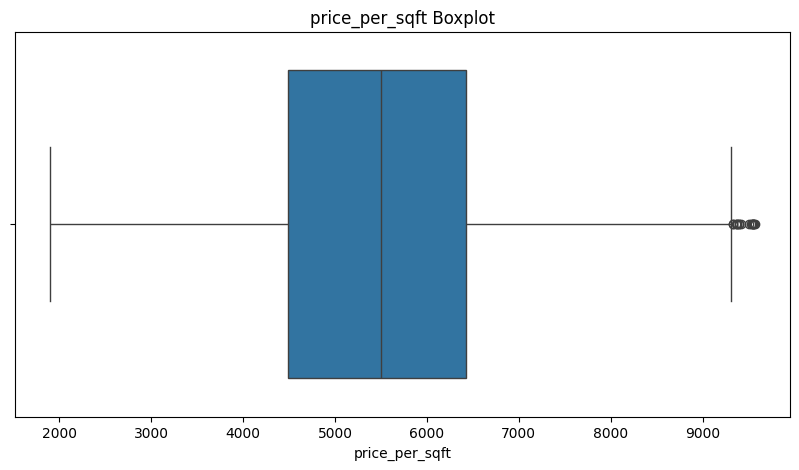

In [39]:
for feature in numerical_features:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=data1[feature])
  plt.title(f'{feature} Boxplot')
  plt.show()

In [40]:
print(data1.shape)


(5887, 9)


In [41]:
data1.to_csv('Cleaned_Bengaluru_House_Data.csv', index=False)


In [42]:
data2 = pd.read_csv('Cleaned_Bengaluru_House_Data.csv')
data2.describe()


,size(BHK),total_sqft,bath,balcony,price,price_per_sqft
count,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000
mean,2.294887,1274.942063,2.204009,1.526754,71.980428,5501.041931
std,0.643068,366.998577,0.630786,0.762654,31.895318,1370.045686
min,1.000000,300.000000,1.000000,0.000000,10.000000,1900.000000
25%,2.000000,1060.000000,2.000000,1.000000,48.000000,4491.795527
50%,2.000000,1210.000000,2.000000,1.000000,67.000000,5500.000000
75%,3.000000,1500.000000,3.000000,2.000000,90.000000,6421.317404
max,4.000000,2423.000000,4.000000,3.000000,170.000000,9565.217391


In [43]:
data1.head(25)

,area_type,availability,location,size(BHK),total_sqft,bath,balcony,price,price_per_sqft
8,Super built-up Area,Ready To Move,1st Phase JP Nagar,3.0,1875.0,3.0,1.0,167.0,8906.666667
13,Super built-up Area,Ready To Move,1st Phase JP Nagar,2.0,1394.0,2.0,1.0,100.0,7173.601148
14,Super built-up Area,Under Construction,1st Phase JP Nagar,2.0,1077.0,2.0,2.0,93.0,8635.097493
15,Built-up Area,Ready To Move,1st Phase JP Nagar,1.0,1280.0,1.0,1.0,63.0,4921.875000
17,Built-up Area,Ready To Move,1st Phase JP Nagar,1.0,840.0,2.0,2.0,50.0,5952.380952
18,Super built-up Area,Under Construction,1st Phase JP Nagar,3.0,1590.0,3.0,3.0,131.0,8238.993711
20,Super built-up Area,Ready To Move,1st Phase JP Nagar,2.0,1180.0,2.0,2.0,88.5,7500.000000
21,Super built-up Area,Ready To Move,1st Phase JP Nagar,2.0,1200.0,2.0,2.0,86.0,7166.666667
22,Built-up Area,Ready To Move,1st Phase JP Nagar,2.0,1394.0,2.0,2.0,85.0,6097.560976
25,Super built-up Area,Ready To Move,1st Phase JP Nagar,2.0,1205.0,2.0,1.0,85.0,7053.941909
